<center>
<h1><b>Big Data Analytics Project</b></h1>
<h3><b>Credit Card Fraud Detection</b></h3>
</center>
By:<br>
SOUBHIK SINHA (19BIT0303)<br>
AASHISH BANSAL (19BIT0346)

Component: NAIVE BAYES CLASSIFIER

# Connecting to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Packages

In [2]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.neighbors import KNeighborsClassifier

# Loading Dataset

In [3]:
file_path = "/content/drive/MyDrive/Project - ITE2013 - Big Data - Credit Card Fraud Detection/dataset/creditcard.csv"
cred = pd.read_csv(file_path)

# Exploratory Data Analysis

## Shape of the Dataset
This will tell us the number of rows and columns which are present in the dataset.

In [4]:
print("The shape of the dataset is: ",cred.shape)

The shape of the dataset is:  (284807, 31)


So, we can see that there are 2,84,807 entries in the dataset provided to us and each entry has 31 columns of data.

## Sample of the Dataset

In [5]:
cred.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Checking the type of data
we should see the datatype of the columns because while training, some of the algorithms do not work on the character data and they might need to be converted.

In [6]:
print("The data types present in the dataset are:",list(set(cred.dtypes.tolist())))

The data types present in the dataset are: [dtype('float64'), dtype('int64')]


So, we can see that there are Integer and Floating-point values, and since there is no character data, we do not need to convert the data to any other data type.

## Obtaining the Description and other Information of Data

In [7]:
cred.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758743e-12,-8.252298e-13,-9.636929e-13,8.316157e-13,1.591952e-13,4.247354e-13,-3.050180e-13,8.693344e-14,-1.179712e-12,7.094854e-13,1.875015e-12,1.053488e-12,7.137527e-13,-1.491363e-13,-5.225914e-13,-2.280712e-13,-6.428517e-13,4.958987e-13,7.060712e-13,1.766038e-12,-3.406543e-13,-5.713163e-13,-9.725303e-13,1.464139e-12,-6.989087e-13,-5.615260e-13,3.332112e-12,-3.518886e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Checking the number of entries according to the Class

In [9]:
print(cred['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64


# Data Visualization
In the visualizations, '0' refers to the valid transactions (these are the transactions which are genuine) whereas '1' refers to the fraud transactions (these transactions are not genuine).

Text(0, 0.5, '')

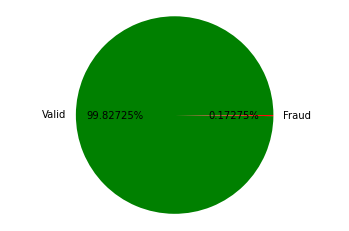

In [10]:
fig, ax = plt.subplots(1, 1)
ax.pie(cred.Class.value_counts(),autopct='%1.5f%%', labels=['Valid','Fraud'], colors=['green','red'])
plt.axis('equal')
plt.ylabel('')

Here the percentage of frauds is 0.2% which is very small as compared to the genuine transactions which makes it very difficult to find.

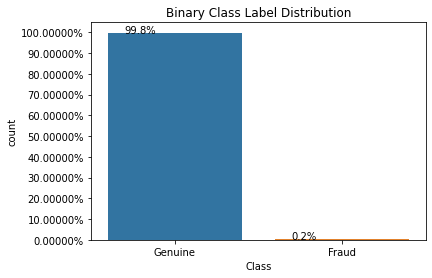

In [11]:
total = len(cred)
ax = sns.countplot(x="Class" , data = cred)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x() + 0.1, p.get_height()+5))

ax.yaxis.set_ticks(np.linspace(0, total, 11))

ax.set_yticklabels(map('{:.5f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.xticks(range(2), ('Genuine', 'Fraud'))
plt.title("Binary Class Label Distribution")
plt.rcParams['figure.figsize']=(4,3)
plt.show()

# Feature Engineering

## Subplots

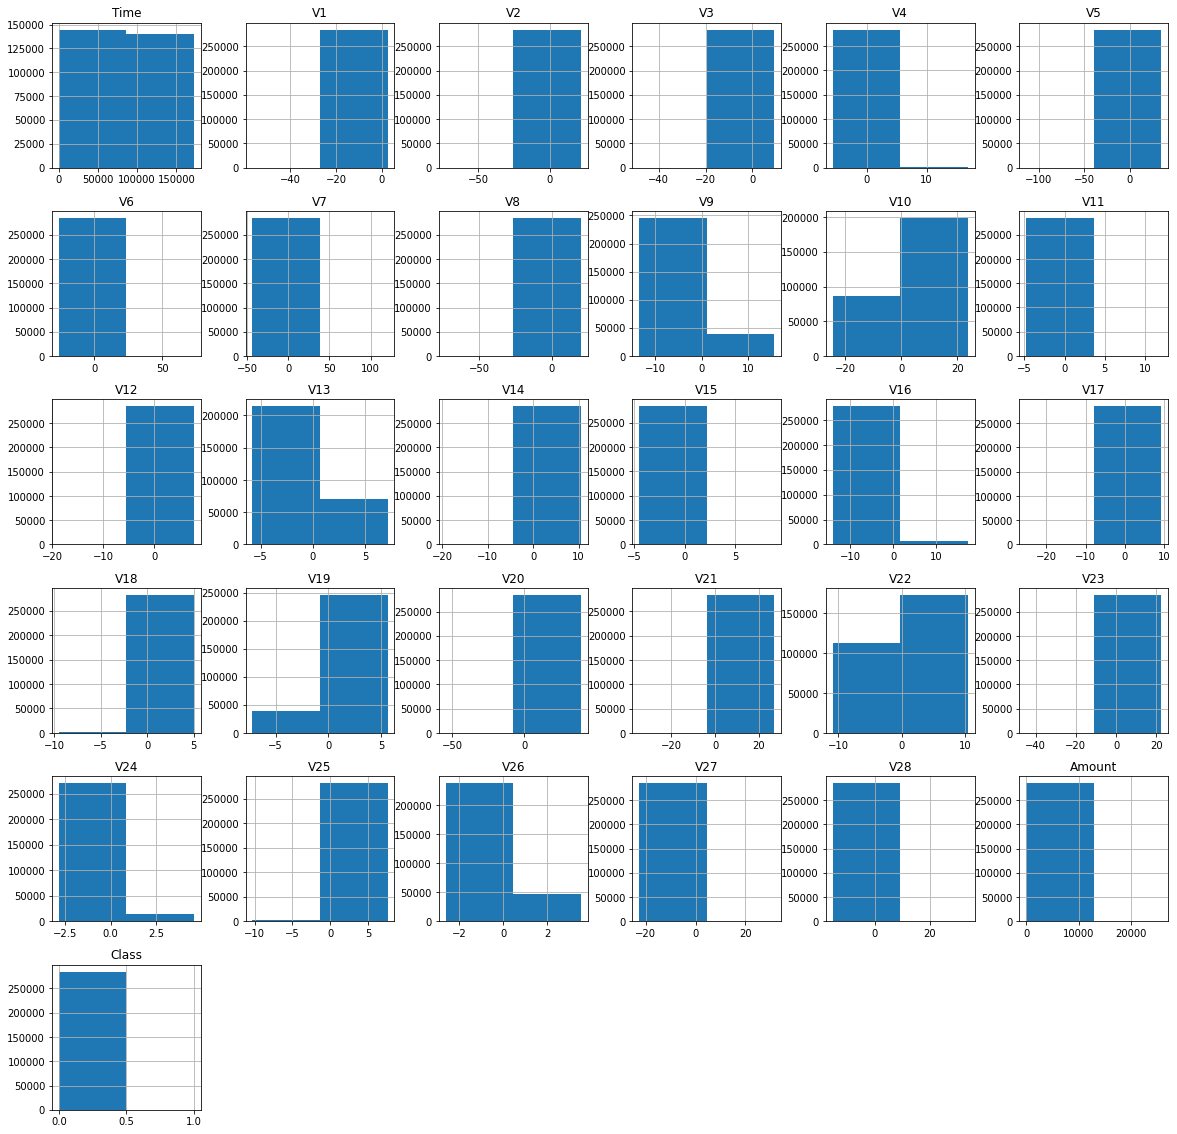

In [12]:
cred.hist(figsize=(20,20),bins=2)
plt.show()

We know that the Amount and the Time are two of the most important features (we can say this even with by intuition).

## Time Feature

Lets check whether the feature Time has anything to do wtih the frauds. For this, we can try to find out the time between the transactions.

In [13]:
print("TIME FEATURE")
cred["HOURS"] = cred["Time"]/3600 # convert to hours
cred["HOURS"].tail()

TIME FEATURE


284802    47.996111
284803    47.996389
284804    47.996667
284805    47.996667
284806    47.997778
Name: HOURS, dtype: float64

Text(0, 0.5, 'NUMBER OF TRANSACTTIONS')

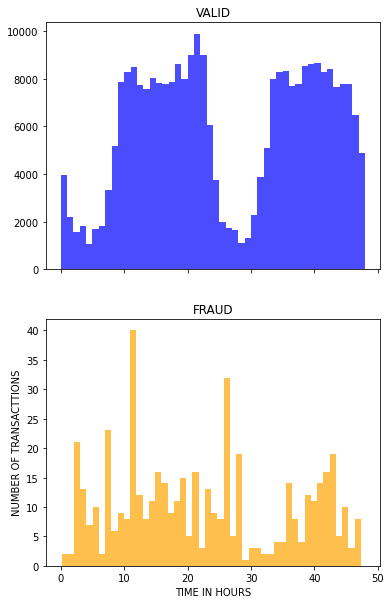

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6,10))
ax1.hist(cred.HOURS[cred.Class==0],bins=48,color='blue',alpha=0.7)
ax1.set_title('VALID')

ax2.hist(cred.HOURS[cred.Class==1],bins=48,color='orange',alpha=0.7)
ax2.set_title('FRAUD')

plt.xlabel('TIME IN HOURS')
plt.ylabel('NUMBER OF TRANSACTTIONS')

So, we have obtained the time between the transactions and we can use that to find a new relation, so we can drop the old column data.

In [15]:
cred = cred.drop(['Time'],axis = 1)

In [16]:
cred

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,HOURS
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000278
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000278
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,47.996111
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,47.996389
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,47.996667
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,47.996667


## Amount Feature
To make a fraud, the amount will genuinely be considered by the fraduants because if the transactions are very huge, then they can be flagged easily but if the amount is kept relative to genuine transactions, then it will be difficult to detect.

Text(0, 0.5, 'No. of transactions')

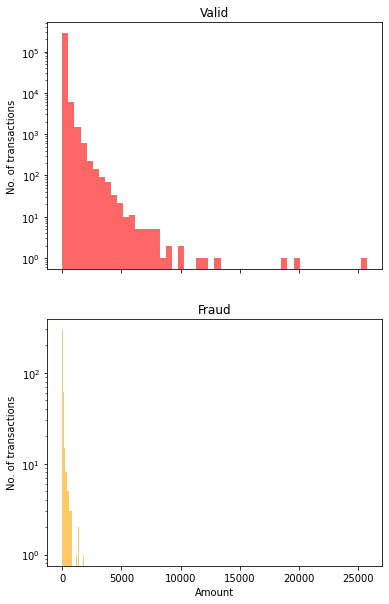

In [17]:
fig, (ax3,ax4) = plt.subplots(2,1, figsize = (6,10), sharex = True)
ax3.hist(cred.Amount[cred.Class==0],bins=50,color='red',alpha=0.6)
ax3.set_yscale('log')
ax3.set_title('Valid')
ax3.set_ylabel('No. of transactions')

ax4.hist(cred.Amount[cred.Class==1],bins=50,color='orange',alpha=0.6)
ax4.set_yscale('log')
ax4.set_title('Fraud')
ax4.set_xlabel('Amount')
ax4.set_ylabel('No. of transactions')

## Scaling Amount and Time

In [18]:
from sklearn.preprocessing import StandardScaler
cred['SCALED_AMT'] = StandardScaler().fit_transform(cred['Amount'].values.reshape(-1,1))
cred['SCALED_TIME'] = StandardScaler().fit_transform(cred['HOURS'].values.reshape(-1,1))

Now, we can drop these columns.

In [19]:
cred = cred.drop(['Amount'],axis=1)

In [20]:
cred = cred.drop(['HOURS'],axis=1)

In [21]:
cred.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,SCALED_AMT,SCALED_TIME
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


## Other Columns
Let's check the correlations among the features. Those are - V1,V2,.....,V28 (total 28 columns).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

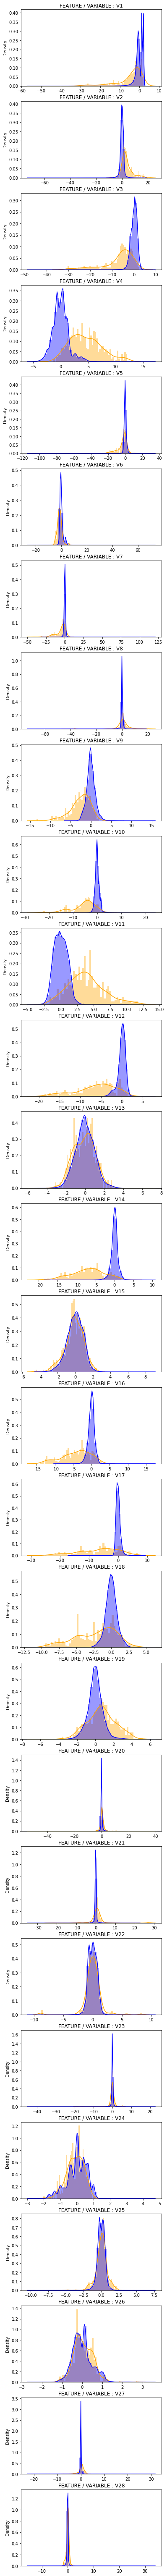

In [22]:
import seaborn as sbn
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6,28*4))
for i, col in enumerate(cred[cred.iloc[:,0:28].columns]):
    ax5 = plt.subplot(gs[i])
    sbn.distplot(cred[col][cred.Class == 1], bins=50, color='orange')
    sbn.distplot(cred[col][cred.Class == 0], bins=50, color='blue')
    ax5.set_xlabel('')
    ax5.set_title('FEATURE / VARIABLE : ' + str(col))
plt.show()

A Correlation matrix is a table showing correlation coefficients between sets of variables.

In [23]:
correlation = cred.corr()

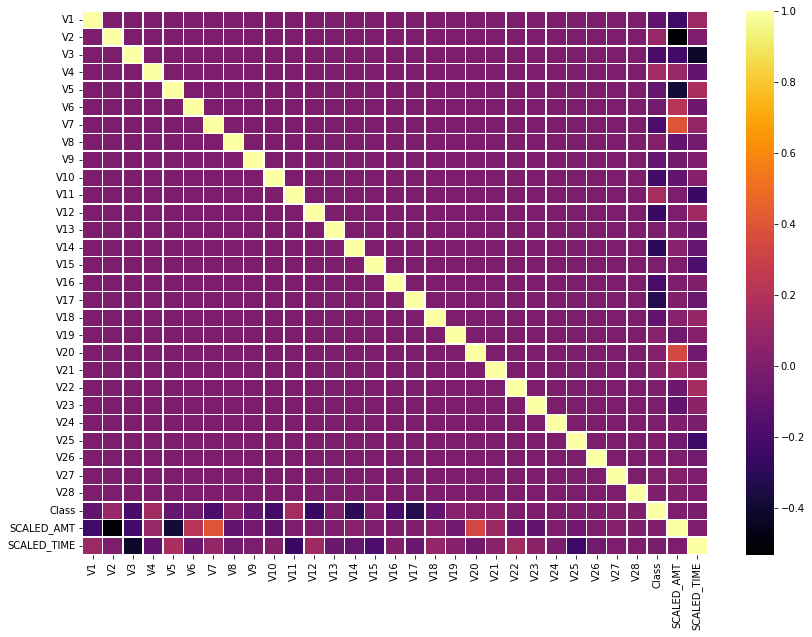

In [24]:
plt.figure(figsize=(14,10))
sns.heatmap(correlation, cmap="inferno",linecolor="white",linewidths=0.5)

If you see the two consecuive coloured blocks of every feature (from V1,V2,V3....to amount and class), you will see there is not much correlation among the features.



# Models - 

## Model 1 - Gaussian Naive Bayes

### Splitting the Dataset
For now, we are not dropping anything.

In [25]:
drop_list = []
cred = cred.drop(drop_list,axis=1)
print("The columns of the Dataset for are: {}".format(cred.columns))

The columns of the Dataset for are: Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'SCALED_AMT',
       'SCALED_TIME'],
      dtype='object')


In [26]:
Y = cred['Class'].values
X = cred.drop(['Class'],axis=1).values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [27]:
print("Training Data Size : ", len(Y_train), "\nTesting Data Size : ", len(Y_test))
print("Fraud cases in Testing Data obtained : ", sum(Y_test))

Training Data Size :  227845 
Testing Data Size :  56962
Fraud cases in Testing Data obtained :  98


### Creating the Model

In [28]:
model_GNB = GaussianNB()

### Fitting the Model

In [29]:
model_GNB.fit(X_train, Y_train)

GaussianNB()

### Predicting using the Model on Training Data

In [30]:
train_predict = model_GNB.predict(X_train)

### Predicting using the Model on Testing Data

In [31]:
Y_predict = model_GNB.predict(X_test)

### Obtaining the Probabilities

In [32]:
Y_predict_prob = model_GNB.predict_proba(X_test)

### Recall

In [33]:
print("recall : ", recall_score(Y_test,Y_predict))

recall :  0.8469387755102041


### Precision

In [34]:
print("precision : ", precision_score(Y_test,Y_predict))

precision :  0.058781869688385266


### F1-Score

In [35]:
print("F1_score : ", f1_score(Y_test,Y_predict))

F1_score :  0.10993377483443707


### Accuracy

In [36]:
print("accuracy : ", accuracy_score(Y_test,Y_predict))

accuracy :  0.9764053228468101


## Model 2 - Columns Dropped

### Splitting the Dataset
Now, we are dropping the columns based on the subplots which we analysed above.

In [37]:
drop_list = ['V1', 'V2', 'V5', 'V6', 'V7', 'V8', 'V9', 'V13', 'V15', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
cred = cred.drop(drop_list,axis=1)
print("The columns of the Dataset for are: {}".format(cred.columns))

The columns of the Dataset for are: Index(['V3', 'V4', 'V10', 'V11', 'V12', 'V14', 'V16', 'Class', 'SCALED_AMT',
       'SCALED_TIME'],
      dtype='object')


In [38]:
Y = cred['Class'].values
X = cred.drop(['Class'],axis=1).values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [39]:
print("Training Data Size : ", len(Y_train), "\nTesting Data Size : ", len(Y_test))
print("Fraud cases in Testing Data obtained : ", sum(Y_test))

Training Data Size :  227845 
Testing Data Size :  56962
Fraud cases in Testing Data obtained :  98


### Creating the Model

In [40]:
model_modified = GaussianNB()

### Fitting the Model

In [41]:
model_modified_fit = model_modified.fit(X_train, Y_train)

### Predicting Using the Model

In [42]:
model_modified_fit_predict = model_modified_fit.predict(X_test)

### Predicting Possibilities

In [43]:
model_modified_predict_prob = model_modified_fit.predict_proba(X_test)

### Accuracy

In [44]:
accuracy = accuracy_score(Y_test, model_modified_fit_predict)
print("Accuracy: ",accuracy)

Accuracy:  0.9918191074751589


### F1-Score

In [45]:
f1score = f1_score(Y_test, model_modified_fit_predict)
print("F1-Score: ", f1score)

F1-Score:  0.2695924764890282


### Precision

In [46]:
precision = precision_score(Y_test, model_modified_fit_predict)
print("Precision: ", precision)

Precision:  0.15925925925925927


### Recall

In [47]:
recall = recall_score(Y_test, model_modified_fit_predict)
print("Recall Score: ", recall)

Recall Score:  0.8775510204081632


### Misclassified Samples

In [48]:
misclassified_samples = X_test[Y_test != model_modified_fit_predict]

In [49]:
misclassified_sample_count = misclassified_samples.shape[0]
print("No. of Misclassified Samples:", misclassified_sample_count)

No. of Misclassified Samples: 466
